<a href="https://colab.research.google.com/github/Nada-Naveesh/Data_Visualization_LAB/blob/main/exp3a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")
df=pd.read_csv("iris.csv")
df.columns=['sepal_length','sepal_width','petal_length','petal_width','species']
df_group=df.groupby(['species','petal_width']).size().reset_index(name='count')
df_group['petal_width'] = df_group['petal_width'].astype(str)
labels=df_group['species'].unique().tolist()+df_group['petal_width'].unique().tolist()
label_to_index = {label: i for i, label in enumerate(labels)}
source = df_group['species'].map(label_to_index)
target=df_group['petal_width'].map(label_to_index)
value = df_group['count']
fig=go.Figure(data=[go.Sankey(node=dict(label=labels),link=dict(source=source, target=target, value=value))])
fig.update_layout(title_text="SankeyChart:SpeciestoPetalWidth")
fig.show()



In [4]:
df_sorted=df.sort_values('sepal_length')
diff=df_sorted['sepal_length'].diff().fillna(df_sorted['sepal_length'])
measure = ['relative'] * (len(df_sorted)-1) + ['total']
fig=go.Figure(go.Waterfall(x=df_sorted.index.astype(str),y=diff,measure=measure, base=0, name="Sepal Length Change"))
fig.update_layout(title="WaterfallChart-SepalLengthChange")
fig.show()

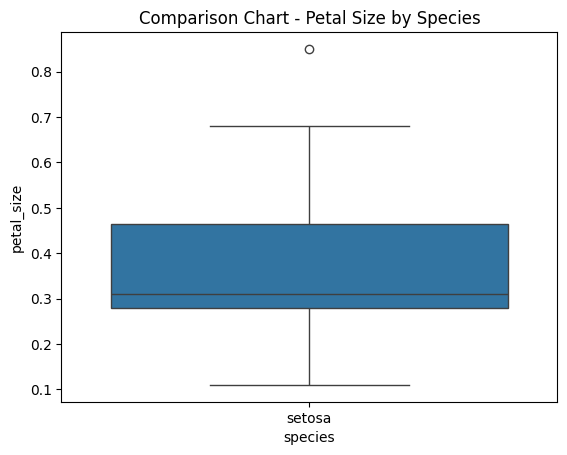

In [6]:
df['petal_size'] = df['petal_length'] * df['petal_width']
sns.boxplot(x='species', y='petal_size', data=df)
plt.title("Comparison Chart - Petal Size by Species")
plt.show()


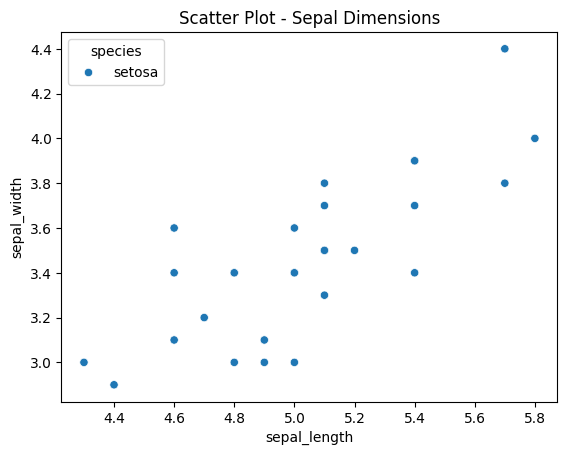

In [7]:
sns.scatterplot(data=df,x='sepal_length',y='sepal_width',hue='species',style='species')
plt.title("Scatter Plot - Sepal Dimensions")
plt.show()


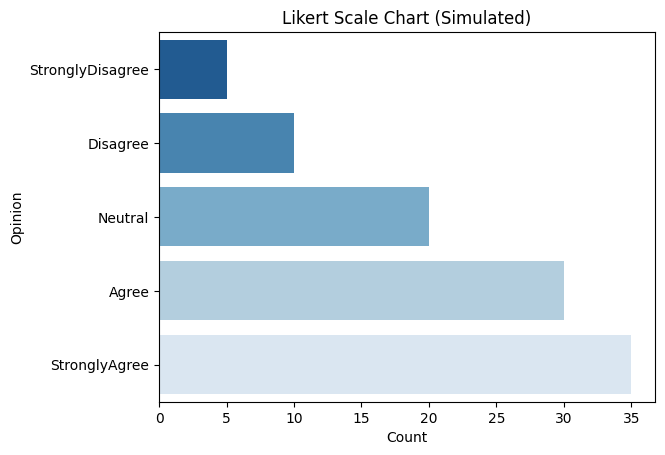

In [9]:
likert_df=pd.DataFrame({
'Opinion':['StronglyDisagree','Disagree','Neutral','Agree','StronglyAgree'], 'Count': [5, 10, 20, 30, 35]
})
sns.barplot(x='Count',y='Opinion',data=likert_df,palette='Blues_r')
plt.title("Likert Scale Chart (Simulated)")
plt.show()